In [18]:
# import classy module
from classy import Class

In [19]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

In [21]:
# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
# To check the format of cls
cls.keys()
print(cls)

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.44689360e-10, ...,
       1.06087567e-17, 1.05689244e-17, 1.05293499e-17]), 'ee': array([0.00000000e+00, 0.00000000e+00, 4.37742239e-15, ...,
       3.90876598e-19, 3.91014892e-19, 3.91147506e-19]), 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.68577990e-13, ...,
       -3.96840417e-19, -3.96998202e-19, -3.97216576e-19]), 'bb': array([0.00000000e+00, 0.00000000e+00, 2.41942438e-19, ...,
       3.35732815e-21, 3.34986577e-21, 3.34241947e-21]), 'pp': array([0.00000000e+00, 0.00000000e+00, 8.62758127e-09, ...,
       1.21171857e-22, 1.20845051e-22, 1.20519202e-22]), 'tp': array([0.00000000e+00, 0.00000000e+00, 4.74962122e-10, ...,
       2.51904084e-23, 2.53462107e-23, 2.55006540e-23]), 'ell': array([   0,    1,    2, ..., 2498, 2499, 2500])}


In [9]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

# print(clPP)

In [10]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

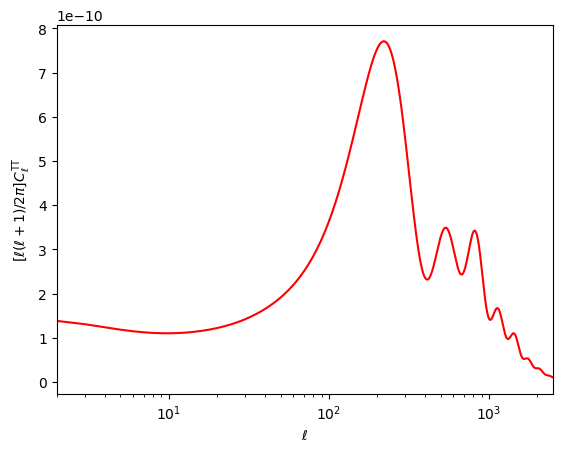

In [11]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')

In [ ]:
plt.savefig('warmup_cltt.pdf')

In [12]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

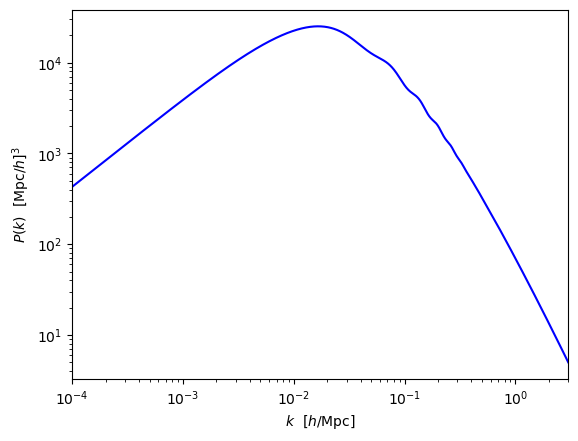

In [13]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-')

In [ ]:
plt.savefig('warmup_pk.pdf')

In [14]:
# optional: reset parameters to default in case you want 
# to set different parameters and rerun LambdaCDM.compute()
LambdaCDM.empty()